In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
cv2.__version__

'4.5.3'

In [3]:
def draw_flow(img, flow, step=16):
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1)
    x = x.astype('int')
    y = y.astype('int')
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
    return vis

In [4]:
cap = cv2.VideoCapture(os.path.join('data','sparse_optical_flow.avi'))
ret, frame1 = cap.read()
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

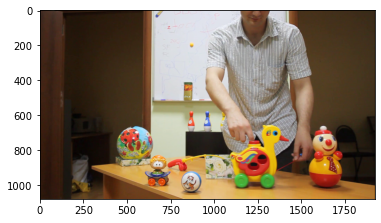

In [5]:
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))

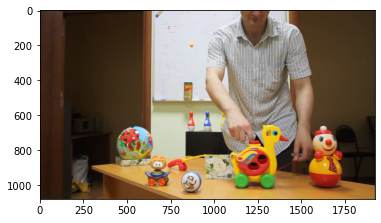

In [6]:
ret, frame2 = cap.read()
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))

In [7]:
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

In [8]:
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

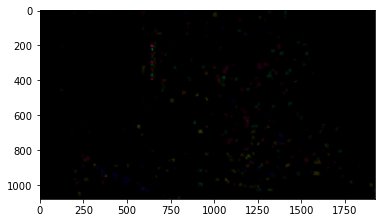

In [9]:
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(bgr)

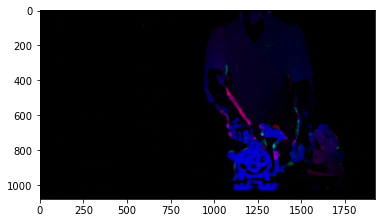

In [10]:
#### repeat ad nauseum ####
prvs = next
ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(bgr)

(-0.5, 1919.5, 1079.5, -0.5)

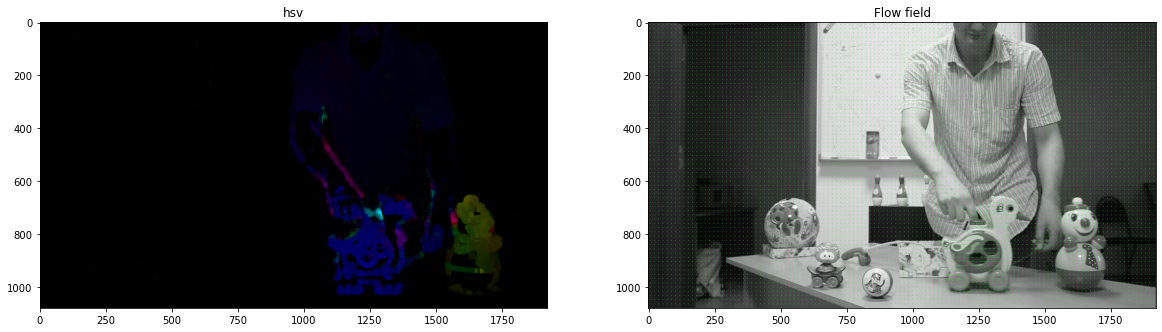

In [11]:
#### Let's show the flow field also ####
prvs = next
ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
fig, ax = plt.subplots(1, 2, figsize = (20,20))

ax[0].imshow(bgr)
ax[0].set_title('hsv')
ax[0].axis('image')

ax[1].imshow(draw_flow(next,flow))
ax[1].set_title('Flow field')
ax[1].axis('image')

(-0.5, 1919.5, 1079.5, -0.5)

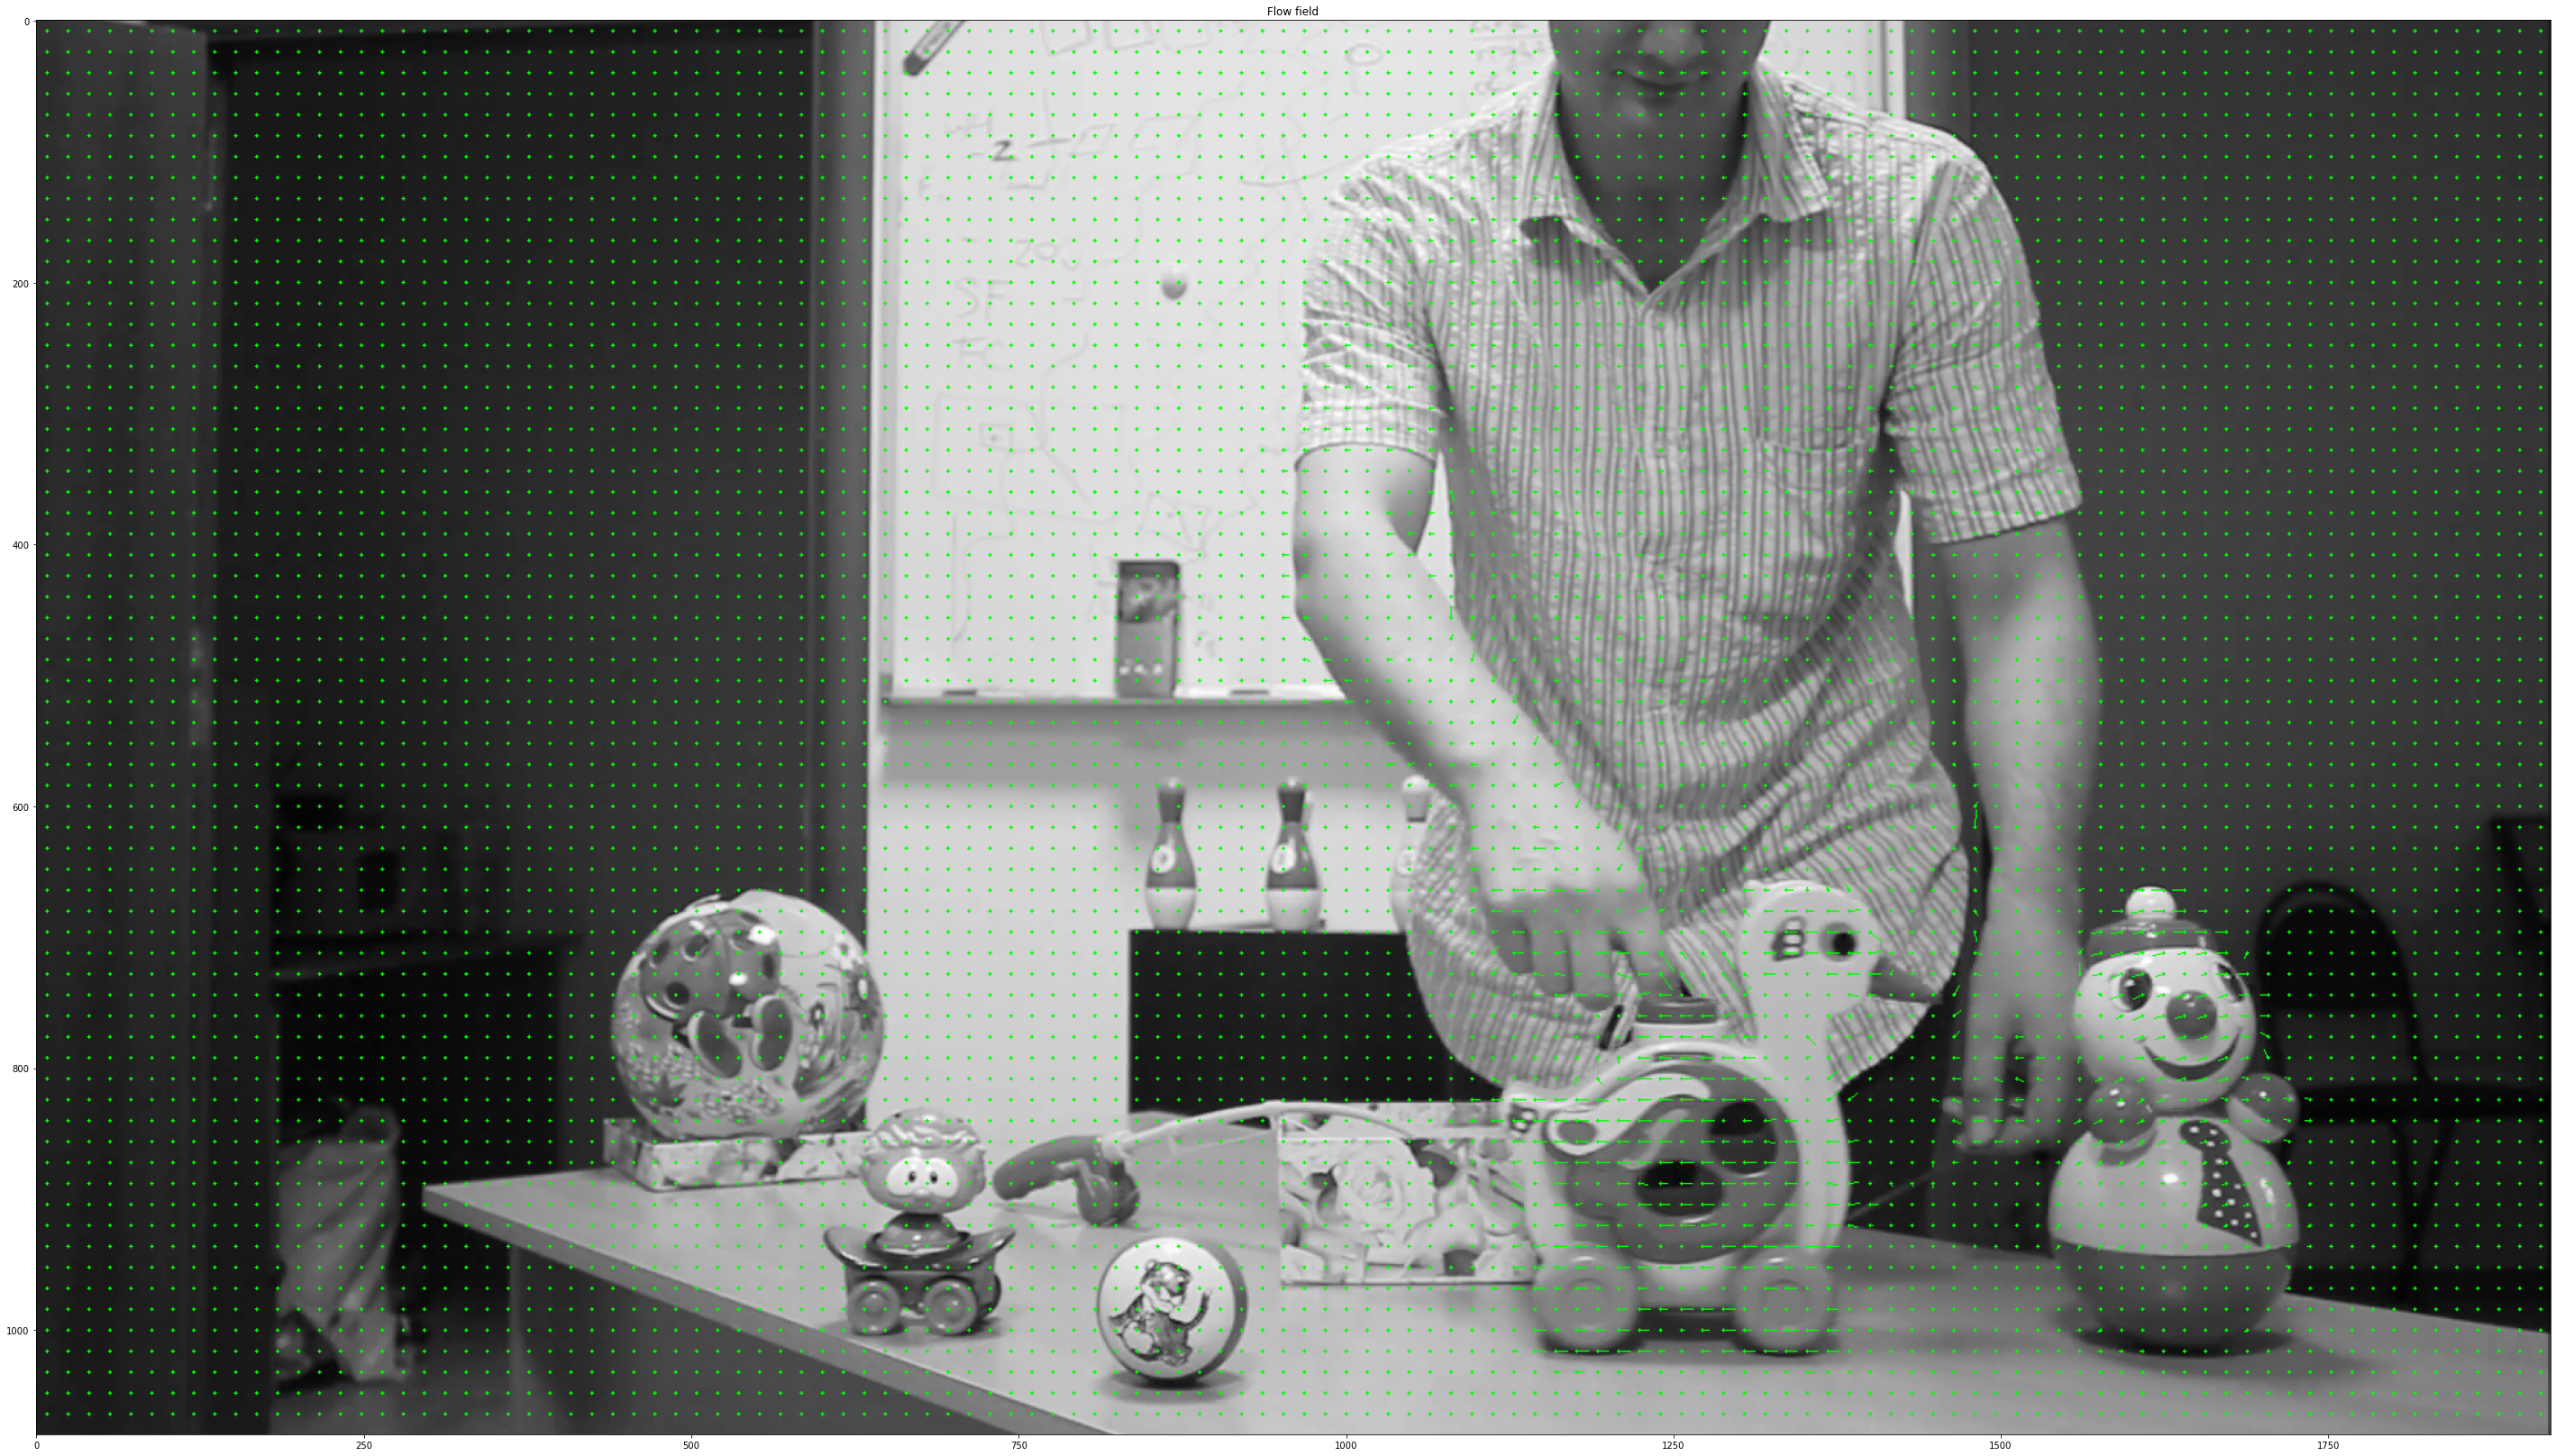

In [12]:
#### Flow field by itself ####
prvs = next
ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
fig, ax = plt.subplots(1, 1, figsize = (50,50))

ax.imshow(draw_flow(next,flow))
ax.set_title('Flow field')
ax.axis('image')

In [13]:
cv2.imwrite('opticalhsv.png',bgr)
cv2.imwrite('opticalfb.png',frame2)
cv2.imwrite('opticalflowfield.png',draw_flow(next,flow))

True

In [14]:
from IPython.display import FileLink, FileLinks
FileLink('./opticalhsv.png')

F:\git-OpenCV-Ipython-notebooks\OpenCV-Ipython-notebooks\opticalhsv.png

In [15]:
video = cv2.VideoWriter('video1.avi',cv2.VideoWriter_fourcc('X','V','I','D'),fps,(width,height))

In [16]:
i=1
while(i<length-5):
    print(i)
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
 
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    video.write(bgr)
    prvs = next
    i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159


In [17]:
video.release()
#FileLink('./video1.avi')